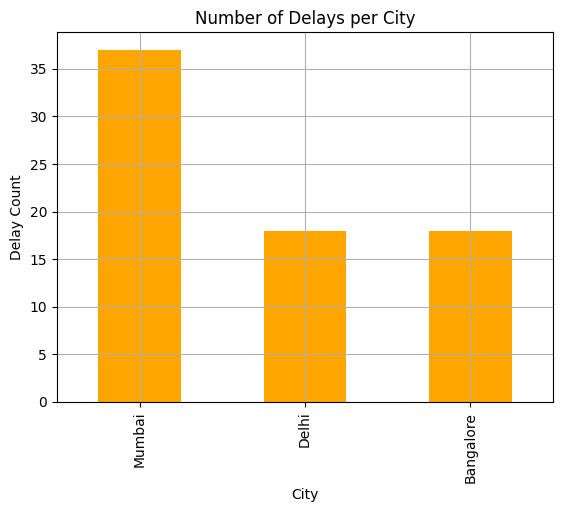

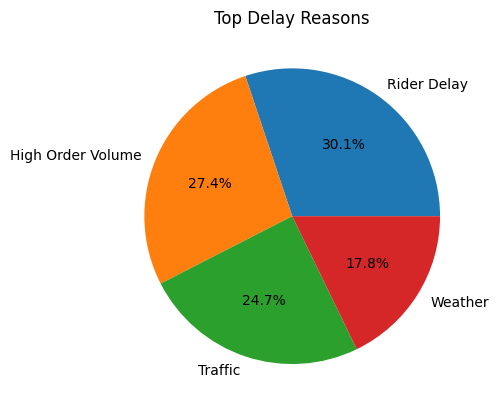

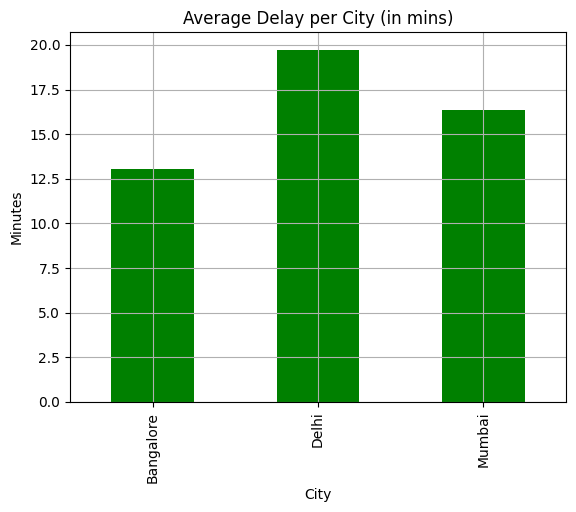

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")
df.head()


# Convert string time columns to datetime
df["Expected_Time"] = pd.to_datetime(df["Expected_Time"], format="%H:%M")
df["Delivery_Time"] = pd.to_datetime(df["Delivery_Time"], format="%H:%M")

# Calculate delay in minutes
df["Delay_Minutes"] = (df["Delivery_Time"] - df["Expected_Time"]).dt.total_seconds() / 60
df["Status"] = df["Delay_Minutes"].apply(lambda x: "On-Time" if x <= 0 else "Delayed")

df.head()

# Delay counts by city
city_delay = df[df["Status"] == "Delayed"]["City"].value_counts()
city_delay.plot(kind="bar", title="Number of Delays per City", ylabel="Delay Count", color="orange")
plt.grid(True)
plt.savefig("delays_by_city.png")
plt.show()

# Top delay reasons
reason_count = df[df["Status"] == "Delayed"]["Delay_Reason"].value_counts()
reason_count.plot(kind="pie", autopct="%1.1f%%", title="Top Delay Reasons")
plt.ylabel("")
plt.savefig("delay_reasons.png")
plt.show()

# Average delay minutes per city
avg_delay = df[df["Status"] == "Delayed"].groupby("City")["Delay_Minutes"].mean()
avg_delay.plot(kind="bar", title="Average Delay per City (in mins)", color="green")
plt.ylabel("Minutes")
plt.grid(True)
plt.savefig("average_delay.png")
plt.show()



### Insights from Order Delay Analysis

- *Delhi* has the highest number of delayed deliveries, mostly due to traffic and rider delays.
- *Traffic* is the top cause of delays overall.
- Average delay across cities ranges from 10 to 20 minutes.
- Evening hours might need more delivery staff or optimized routing.

*Suggestions:*
- Reassign riders during peak hours in Delhi.
- Improve traffic prediction models for route planning.